# Experiment 04

This Experiment is the main experiment of the work, consists in run an optimized Random Forest in order to try to predict the values in question.(https://www.researchgate.net/publication/221533996_From_an_artificial_neural_network_to_a_stock_market_day-trading_system_A_case_study_on_the_BMF_BOVESPA).

In [1]:
import numpy as np
import pandas as pd

import Utils 
from Utils import calculateEMA, calculateBB, addPreviousDays, removeColumns, getPeriod, mape, mae, createDate, getDate, printResult

import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor

### Constants and Parameters

In [ ]:
dfColumns = ['date','open', 'high', 'low','close','tickvol','volume','spread']
newColumns = ['open', 'high', 'low', 'close']
col15 = ['open','d-5_high','d-5_low','d-4_high','d-4_low','d-3_high','d-3_low','d-2_high','d-2_low','d-1_high','d-1_low','EMA_high','EMA_low','UB_close','LB_close']
col25 = ['open','d-5_open','d-5_high','d-5_low','d-5_close','d-4_open','d-4_high','d-4_low','d-4_close','d-3_open','d-3_high','d-3_low','d-3_close','d-2_open','d-2_high','d-2_low','d-2_close','d-1_open','d-1_high','d-1_low','d-1_close','EMA_high' ,'EMA_low','UB_close','LB_close']
DAYS = 5
TEST_BEGIN = '2021.04.06'
TEST_END = '2021.06.01'
TRAIN_BEGIN = '2018.03.30'
TRAIN_END = '2021.04.05'
TIMES = 10

### Opening the dataset

In [3]:
df = pd.read_csv('../Data/PETR4_Daily.csv', sep = "\t")
df.columns = dfColumns
df = removeColumns(df, ['tickvol', 'volume','spread'])

df2 = pd.read_csv('../Data/VALE3_Daily.csv', sep = "\t")

df2.columns = dfColumns
df2 = removeColumns(df2, ['tickvol', 'volume','spread'])

df 
df.tail(290)

,date,open,high,low,close
1049,2020.03.31,13.16,14.07,13.16,13.54
1050,2020.04.01,13.01,14.08,12.89,13.84
1051,2020.04.02,14.90,16.01,14.52,15.01
1052,2020.04.03,15.77,15.83,14.44,14.84
1053,2020.04.06,15.53,15.58,14.69,15.26
...,...,...,...,...,...
1334,2021.05.26,25.91,26.18,25.65,26.09
1335,2021.05.27,26.08,26.25,25.77,25.91
1336,2021.05.28,26.20,27.02,26.15,26.99
1337,2021.05.31,26.96,27.20,26.78,26.87


In [4]:
#PETR4
df = calculateEMA(df,DAYS,newColumns)
df = calculateBB(df,DAYS,newColumns)
df = addPreviousDays(df,DAYS, newColumns)

#VALE3
df2 = calculateEMA(df2,DAYS,newColumns)
df2 = calculateBB(df2,DAYS,newColumns)
df2 = addPreviousDays(df2,DAYS, newColumns)

In [5]:
##df = getPeriod(df, '2020.03.02','2021.04.30', True)
##initialDf = getPeriod(df, '2020.03.02','2021.04.30', True)

In [10]:
initialDf_PETR4 = getPeriod(df, '2016.01.04','2021.06.01', True)
initialDf_VALE3 = getPeriod(df2, '2016.01.04','2021.06.01', True)

In [12]:
initialDf_PETR4

,date,open,high,low,close,EMA_open,EMA_high,EMA_low,EMA_close,UB_open,...,d-3_low,d-3_close,d-4_open,d-4_high,d-4_low,d-4_close,d-5_open,d-5_high,d-5_low,d-5_close
0,2016.01.04,5.96,6.38,5.94,6.23,5.960000,6.380000,5.940000,6.230000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016.01.05,6.28,6.35,6.00,6.06,6.280000,6.350000,6.000000,6.060000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016.01.06,5.92,5.93,5.80,5.80,5.920000,5.930000,5.800000,5.800000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016.01.07,5.61,5.83,5.51,5.68,5.610000,5.830000,5.510000,5.680000,NaN,...,5.94,6.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016.01.08,5.79,5.85,5.56,5.69,6.053333,6.220000,5.913333,6.030000,6.405842,...,6.00,6.06,5.96,6.38,5.94,6.23,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,2021.05.26,25.91,26.18,25.65,26.09,26.114791,26.354219,25.760657,26.042263,26.608719,...,25.94,25.95,26.15,26.28,25.72,25.93,25.85,26.35,25.80,26.15
1335,2021.05.27,26.08,26.25,25.77,25.91,26.103194,26.319479,25.763771,25.998175,26.604087,...,25.99,26.39,26.08,26.31,25.94,25.95,26.15,26.28,25.72,25.93
1336,2021.05.28,26.20,27.02,26.15,26.99,26.135462,26.552986,25.892514,26.328784,26.617551,...,25.78,25.84,26.28,26.52,25.99,26.39,26.08,26.31,25.94,25.95
1337,2021.05.31,26.96,27.20,26.78,26.87,26.410308,26.768657,26.188343,26.509189,27.147657,...,25.65,26.09,26.48,26.62,25.78,25.84,26.28,26.52,25.99,26.39


In [7]:
initialDf_VALE3

,date,open,high,low,close,EMA_open,EMA_high,EMA_low,EMA_close,UB_open,...,d-3_low,d-3_close,d-4_open,d-4_high,d-4_low,d-4_close,d-5_open,d-5_high,d-5_low,d-5_close
0,2019.01.02,45.72,46.96,45.52,46.71,45.965361,46.778539,45.580846,46.324671,46.091838,...,45.16,46.11,45.97,46.85,45.91,46.50,46.39,46.78,45.21,45.54
1,2019.01.03,46.44,46.57,44.25,44.80,46.123574,46.709026,45.137231,45.816447,46.532241,...,45.05,45.25,45.81,46.35,45.16,46.11,45.97,46.85,45.91,46.50
2,2019.01.04,45.55,47.95,45.55,47.71,45.932382,47.122684,45.274820,46.447631,46.581616,...,45.94,46.63,45.80,46.07,45.05,45.25,45.81,46.35,45.16,46.11
3,2019.01.07,48.34,49.05,47.28,47.46,46.734922,47.765123,45.943214,46.785088,48.670273,...,45.52,46.71,45.99,46.81,45.94,46.63,45.80,46.07,45.05,45.25
4,2019.01.08,47.72,48.27,47.19,47.91,47.063281,47.933415,46.358809,47.160058,49.216909,...,44.25,44.80,45.72,46.96,45.52,46.71,45.99,46.81,45.94,46.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2021.05.26,106.37,110.32,106.03,110.20,109.166674,111.131617,107.622606,109.807900,113.973861,...,108.50,109.40,111.70,112.10,110.20,111.11,112.10,112.78,109.84,112.25
595,2021.05.27,110.80,112.09,109.77,110.99,109.711116,111.451078,108.338404,110.201933,113.405981,...,107.51,109.78,111.11,111.25,108.50,109.40,111.70,112.10,110.20,111.11
596,2021.05.28,111.11,112.75,109.42,111.59,110.177411,111.884052,108.698936,110.664622,113.405981,...,106.78,107.05,108.00,110.14,107.51,109.78,111.11,111.25,108.50,109.40
597,2021.05.31,112.50,114.89,112.50,114.78,110.951607,112.886035,109.965957,112.036415,114.811204,...,106.03,110.20,110.28,110.89,106.78,107.05,108.00,110.14,107.51,109.78


#### Experimento 04: Utilizando Random Forest

In [9]:
def exp04(df, stock, inputColumns = []):
    #df = getPeriod(df, '2020.03.02','2021.04.30', True)
    #print(df)
    
    df_train = getPeriod(df, TRAIN_BEGIN, TRAIN_END)
    df_test = getPeriod(df, TEST_BEGIN, TEST_END)
    
    if(inputColumns == []):
        x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
        y_train = df_train[['high','low']]

        x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
        y_test = df_test[['high','low']]
    else:
        x_train = df_train[inputColumns]
        y_train = df_train[['high','low']]

        x_test = df_test[inputColumns]
        y_test = df_test[['high','low']]

    rf = RandomForestRegressor(n_estimators = 500)
    rf.fit(x_train, y_train);
    y_pred = rf.predict(x_test)
    
    errorMax = mape(y_test['high'],y_pred[:,0])
    errorMin = mape(y_test['low'],y_pred[:,1])
    
    #print (mape(y_test['high'],y_pred[:,0]))
    #print (mape(y_test['low'],y_pred[:,1]))
    #print (mae(y_test['high'],y_pred[:,0]))
    #print (mae(y_test['low'],y_pred[:,1]))
    
    return errorMax, errorMin

def test30timesExp04(df,stock, phrase, columnInput = []):
    errorMax = []
    errorMin = []
    
    for i in range(1, TIMES+1):
        if(columnInput == []):
            errorMax_petr4, errorMin_petr4 = exp04(df, stock)
        else: 
            errorMax_petr4, errorMin_petr4 = exp04(df, stock, columnInput)
            
        errorMax.append(errorMax_petr4[0])
        errorMin.append(errorMin_petr4[0])
    
    errorMax = np.array(errorMax)
    errorMin = np.array(errorMin)
    print(phrase)
    printResult((errorMax.mean(),errorMax.std()), 'High')
    printResult((errorMin.mean(),errorMin.std()), 'Low')
    
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 15 Variables', col15) 
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 25 Variables', col25) 
test30timesExp04(initialDf_PETR4, 'PETR4', 'PETR4 33 Variables') 
print('\n')
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 15 Variables', col15) 
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 25 Variables', col25) 
test30timesExp04(initialDf_VALE3, 'VALE3', 'VALE3 33 Variables')     

PETR4 15 Variables
High: 1.15 +- 0.03 %
Low: 0.63 +- 0.01 %
PETR4 25 Variables
High: 1.17 +- 0.04 %
Low: 0.65 +- 0.02 %
PETR4 33 Variables
High: 1.1 +- 0.03 %
Low: 0.68 +- 0.02 %


VALE3 15 Variables
High: 8.03 +- 0.09 %
Low: 8.74 +- 0.05 %
VALE3 25 Variables
High: 8.17 +- 0.08 %
Low: 8.84 +- 0.05 %
VALE3 33 Variables
High: 8.03 +- 0.08 %
Low: 8.68 +- 0.05 %


In [10]:
df4 = getPeriod(initialDf_PETR4, '2020.03.02','2021.04.30', True)

df_train = getPeriod(df4, '2020.03.02','2021.03.31')
df_test = getPeriod(df4, '2021.04.01','2021.04.30')

x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
y_train = df_train[['high','low']]

x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
y_test = df_test[['high','low']]

rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(x_train, y_train);
y_pred = rf.predict(x_test)

print (mape(y_test['high'],y_pred[:,0]))
print (mape(y_test['low'],y_pred[:,1]))
print (mae(y_test['high'],y_pred[:,0]))
print (mae(y_test['low'],y_pred[:,1]))

(1.2097407745304578, 1.1680444381642863)
(0.816605545046884, 0.6794028981892051)
(0.29008449999985864, 0.2887711786948039)
(0.1901740000000734, 0.15932806398754892)


Feature: open, Score: 0.88575
Feature: EMA_open, Score: 0.00110
Feature: EMA_high, Score: 0.00360
Feature: EMA_low, Score: 0.00891
Feature: EMA_close, Score: 0.01701
Feature: UB_open, Score: 0.00031
Feature: LB_open, Score: 0.00919
Feature: UB_high, Score: 0.00064
Feature: LB_high, Score: 0.00677
Feature: UB_low, Score: 0.00122
Feature: LB_low, Score: 0.00278
Feature: UB_close, Score: 0.00115
Feature: LB_close, Score: 0.01141
Feature: d-1_open, Score: 0.00179
Feature: d-1_high, Score: 0.00763
Feature: d-1_low, Score: 0.01096
Feature: d-1_close, Score: 0.02327
Feature: d-2_open, Score: 0.00018
Feature: d-2_high, Score: 0.00029
Feature: d-2_low, Score: 0.00209
Feature: d-2_close, Score: 0.00153
Feature: d-3_open, Score: 0.00012
Feature: d-3_high, Score: 0.00013
Feature: d-3_low, Score: 0.00037
Feature: d-3_close, Score: 0.00041
Feature: d-4_open, Score: 0.00014
Feature: d-4_high, Score: 0.00016
Feature: d-4_low, Score: 0.00013
Feature: d-4_close, Score: 0.00018
Feature: d-5_open, Score: 

<BarContainer object of 33 artists>

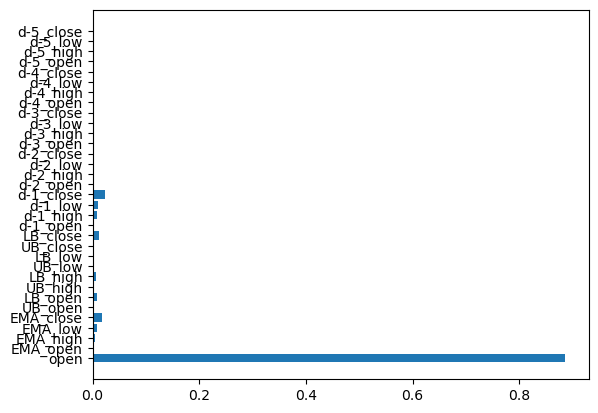

In [11]:
importance = rf.feature_importances_
feature_names = x_train.columns  
for name, score in zip(feature_names, importance):
    print(f'Feature: {name}, Score: {score:.5f}')

importance

from matplotlib import pyplot as plt
plt.barh(x_train.columns, rf.feature_importances_)

In [14]:
def exp041(df, stock, inputColumns = []):
    #df = getPeriod(df, '2020.03.02','2021.04.30', True)
    
    #print(df)
    df_train = getPeriod(df, TRAIN_BEGIN, TRAIN_END)
    df_test = getPeriod(df, TEST_BEGIN, TEST_END)
    
    if(inputColumns == []):
        x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
        y_train = df_train[['high','low']]

        x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
        y_test = df_test[['high','low']]
    else:
        x_train = df_train[inputColumns]
        y_train = df_train[['high','low']]

        x_test = df_test[inputColumns]
        y_test = df_test[['high','low']]

    for i in range(1, 5):    
        rf = RandomForestRegressor(n_estimators = 300)
        rf.fit(x_train, y_train);
        y_pred = rf.predict(x_test)
        
        print(i)
        errorMax = mape(y_test['high'],y_pred[:,0])
        errorMin = mape(y_test['low'],y_pred[:,1])
        printResult(errorMax, 'High')
        printResult(errorMin, 'Low')
    
    importance = rf.feature_importances_
    
    featureImp = []
    for feat, importance in zip(x_train.columns, rf.feature_importances_):  
        temp = [feat, importance*100]
        featureImp.append(temp)

    #fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
    #print (fT_df.sort_values('Importance', ascending = False))
    
    #print (mape(y_test['high'],y_pred[:,0]))
    #print (mape(y_test['low'],y_pred[:,1]))
    #print (mae(y_test['high'],y_pred[:,0]))
    #print (mae(y_test['low'],y_pred[:,1]))
    
    return errorMax, errorMin, y_pred, y_test

a,b,c,d = exp041(initialDf_PETR4, 'PETR4')

e,f,g,h = exp041(initialDf_VALE3, 'VALE3')

1
High: 1.05 +- 0.94 %
Low: 0.68 +- 0.44 %
2
High: 1.1 +- 0.93 %
Low: 0.69 +- 0.44 %
3
High: 1.05 +- 0.94 %
Low: 0.65 +- 0.44 %
4
High: 1.08 +- 0.93 %
Low: 0.69 +- 0.46 %
1
High: 7.95 +- 3.38 %
Low: 8.63 +- 2.99 %
2
High: 7.83 +- 3.37 %
Low: 8.55 +- 2.98 %
3
High: 8.05 +- 3.37 %
Low: 8.68 +- 2.98 %
4
High: 7.88 +- 3.39 %
Low: 8.58 +- 2.99 %


In [15]:
printResult(a, 'High')
printResult(b, 'Low')

High: 1.08 +- 0.93 %
Low: 0.69 +- 0.46 %


In [16]:
d['high_pred'] = c[:,0]
d['low_pred'] = c[:,1]
d['date'] = getPeriod(initialDf_PETR4, TEST_BEGIN, TEST_END)['date']
d.to_pickle('../Data/PETR4_Pred.pkl')
d.tail(10)


,high,low,high_pred,low_pred,date
589,26.35,25.80,26.535933,25.722600,2021.05.19
590,26.28,25.72,26.385000,25.679233,2021.05.20
591,26.31,25.94,26.491167,25.709767,2021.05.21
592,26.52,25.99,26.617400,25.806100,2021.05.24
593,26.62,25.78,26.718667,25.938800,2021.05.25
594,26.18,25.65,26.325033,25.600600,2021.05.26
595,26.25,25.77,26.362300,25.643967,2021.05.27
596,27.02,26.15,26.872600,26.006533,2021.05.28
597,27.20,26.78,27.203500,26.543933,2021.05.31
598,27.70,27.01,27.576467,27.126167,2021.06.01


In [17]:
h['high_pred'] = g[:,0]
h['low_pred'] = g[:,1]
h['date'] = getPeriod(initialDf_VALE3, TEST_BEGIN, TEST_END)['date']
h.to_pickle('../Data/VALE3_Pred.pkl')
h.tail(10)

,high,low,high_pred,low_pred,date
589,112.78,109.84,102.342633,99.039733,2021.05.19
590,112.10,110.20,102.342633,99.039733,2021.05.20
591,111.25,108.50,102.342633,99.039733,2021.05.21
592,110.14,107.51,102.342633,99.039733,2021.05.24
593,110.89,106.78,102.342633,99.039733,2021.05.25
594,110.32,106.03,102.342633,99.039733,2021.05.26
595,112.09,109.77,102.342633,99.039733,2021.05.27
596,112.75,109.42,102.342633,99.039733,2021.05.28
597,114.89,112.50,102.342633,99.039733,2021.05.31
598,118.00,113.20,102.342633,99.039733,2021.06.01


In [18]:
initialDf_PETR4

,date,open,high,low,close,EMA_open,EMA_high,EMA_low,EMA_close,UB_open,...,d-3_low,d-3_close,d-4_open,d-4_high,d-4_low,d-4_close,d-5_open,d-5_high,d-5_low,d-5_close
0,2019.01.02,21.18,22.73,20.93,22.60,20.609175,21.499077,20.380957,21.271656,21.776315,...,19.18,20.37,19.55,20.08,19.41,19.69,20.38,20.39,19.50,19.63
1,2019.01.03,22.51,23.32,22.36,23.16,21.242783,22.106051,21.040638,21.901104,23.157151,...,19.99,20.36,19.34,20.37,19.18,20.37,19.55,20.08,19.41,19.69
2,2019.01.04,23.35,23.43,22.99,23.22,21.945189,22.547367,21.690425,22.340736,24.186721,...,20.74,21.31,20.22,20.65,19.99,20.36,19.34,20.37,19.18,20.37
3,2019.01.07,23.35,24.35,23.20,23.59,22.413459,23.148245,22.193617,22.757157,24.644733,...,20.93,22.60,20.77,21.45,20.74,21.31,20.22,20.65,19.99,20.36
4,2019.01.08,23.86,23.88,23.27,23.45,22.895640,23.392163,22.552411,22.988105,24.953473,...,22.36,23.16,21.18,22.73,20.93,22.60,20.77,21.45,20.74,21.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2021.05.26,25.91,26.18,25.65,26.09,26.114791,26.354219,25.760657,26.042263,26.608719,...,25.94,25.95,26.15,26.28,25.72,25.93,25.85,26.35,25.80,26.15
595,2021.05.27,26.08,26.25,25.77,25.91,26.103194,26.319479,25.763771,25.998175,26.604087,...,25.99,26.39,26.08,26.31,25.94,25.95,26.15,26.28,25.72,25.93
596,2021.05.28,26.20,27.02,26.15,26.99,26.135462,26.552986,25.892514,26.328784,26.617551,...,25.78,25.84,26.28,26.52,25.99,26.39,26.08,26.31,25.94,25.95
597,2021.05.31,26.96,27.20,26.78,26.87,26.410308,26.768657,26.188343,26.509189,27.147657,...,25.65,26.09,26.48,26.62,25.78,25.84,26.28,26.52,25.99,26.39


# Testes Joao

In [ ]:
def exp041(df, stock, inputColumns = []):
    #df = getPeriod(df, '2020.03.02','2021.04.30', True)
    
    #print(df)
    df_train = getPeriod(df, '2016.03.29', '2021.04.05')
    df_test = getPeriod(df, '2021.04.06', '2021.06.01')
    
    if(inputColumns == []):
        x_train = df_train.drop(['date', 'high', 'low', 'close'], axis=1)
        y_train = df_train[['high','low']]

        x_test = df_test.drop(['date', 'high', 'low', 'close'], axis=1)
        y_test = df_test[['high','low']]
    else:
        x_train = df_train[inputColumns]
        y_train = df_train[['high','low']]

        x_test = df_test[inputColumns]
        y_test = df_test[['high','low']]

    for i in range(1, 5):    
        rf = RandomForestRegressor(n_estimators = 300)
        rf.fit(x_train, y_train)
        # Obter previsões individuais de cada árvore
        predictions_per_tree = np.array([tree.predict(x_test) for tree in rf.estimators_])

        # Média das predições (previsão final)
        y_pred = predictions_per_tree.mean(axis=0)
        # Desvio padrão como medida de incerteza/confiança
        confidence_intervals = predictions_per_tree.std(axis=0)
        
        print(i)
        errorMax = mape(y_test['high'],y_pred[:,0])
        errorMin = mape(y_test['low'],y_pred[:,1])
        printResult(errorMax, 'High')
        printResult(errorMin, 'Low')
    
    importance = rf.feature_importances_
    
    featureImp = []
    for feat, importance in zip(x_train.columns, rf.feature_importances_):  
        temp = [feat, importance*100]
        featureImp.append(temp)

    #fT_df = pd.DataFrame(featureImp, columns = ['Feature', 'Importance'])
    #print (fT_df.sort_values('Importance', ascending = False))
    
    #print (mape(y_test['high'],y_pred[:,0]))
    #print (mape(y_test['low'],y_pred[:,1]))
    #print (mae(y_test['high'],y_pred[:,0]))
    #print (mae(y_test['low'],y_pred[:,1]))
    
    return errorMax, errorMin, y_pred, y_test, confidence_intervals

a,b,c,d,e = exp041(initialDf_PETR4, 'PETR4')

f,g,h,i,j = exp041(initialDf_VALE3, 'VALE3')

1
High: 0.8 +- 0.99 %
Low: 0.66 +- 0.5 %
2
High: 0.79 +- 0.99 %
Low: 0.67 +- 0.52 %
3
High: 0.79 +- 0.98 %
Low: 0.67 +- 0.52 %
4
High: 0.77 +- 0.98 %
Low: 0.68 +- 0.5 %
1
High: 8.01 +- 3.37 %
Low: 8.66 +- 2.98 %
2
High: 8.0 +- 3.37 %
Low: 8.63 +- 2.98 %
3
High: 8.05 +- 3.36 %
Low: 8.7 +- 2.98 %
4
High: 8.17 +- 3.37 %
Low: 8.8 +- 2.98 %


## PETR4

In [23]:
d['high_pred'] = c[:,0]
d['low_pred'] = c[:,1]
d['uncertainty'] = e[:,0]
d['date'] = getPeriod(initialDf_PETR4, TEST_BEGIN, TEST_END)['date']
d.to_pickle('../Data/PETR4_Pred_with_confidence.pkl')
d.tail(10)

,high,low,high_pred,low_pred,uncertainty,date
1329,26.35,25.80,26.152767,25.546200,0.270977,2021.05.19
1330,26.28,25.72,26.322167,25.831300,0.201738,2021.05.20
1331,26.31,25.94,26.274567,25.802933,0.243619,2021.05.21
1332,26.52,25.99,26.380767,25.884400,0.289425,2021.05.24
1333,26.62,25.78,26.613767,26.178800,0.252752,2021.05.25
1334,26.18,25.65,26.142300,25.667000,0.215056,2021.05.26
1335,26.25,25.77,26.248700,25.797700,0.190196,2021.05.27
1336,27.02,26.15,26.468433,25.856967,0.335756,2021.05.28
1337,27.20,26.78,27.264467,26.669700,0.281216,2021.05.31
1338,27.70,27.01,27.630600,27.111833,0.195980,2021.06.01


Number of samples with uncertainty under 0.21: 7
Number of samples with uncertainty under 0.26: 20
Number of samples with uncertainty under 0.3: 31
Number of samples with uncertainty under 0.4: 39
Number of samples with uncertainty under 0.5: 40
Number of samples with uncertainty under 0.6: 40
Number of samples with uncertainty under 0.7: 40
Number of samples with uncertainty under 0.8: 40
Number of samples with uncertainty under 0.9: 40


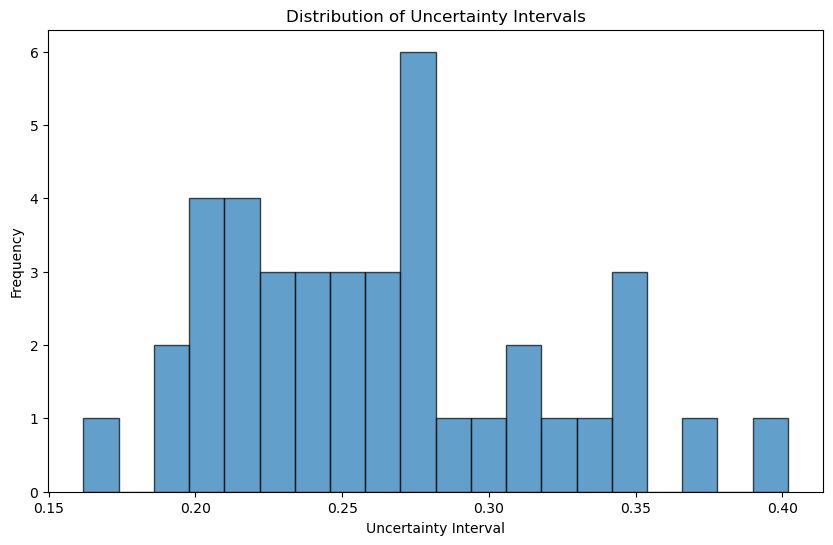

In [31]:
# Calculate the percentage of samples with uncenrtainty under certain thresholds
thresholds = [0.21,0.26,0.3,0.4,0.5, 0.6, 0.7, 0.8, 0.9]
counts = [(d['uncertainty'] < threshold).sum() for threshold in thresholds]

# Display the counts
for threshold, count in zip(thresholds, counts):
    print(f'Number of samples with uncertainty under {threshold}: {count}')

# Plot the distribution of the confidence column
plt.figure(figsize=(10, 6))
plt.hist(d['uncertainty'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Uncertainty Intervals')
plt.xlabel('Uncertainty Interval')
plt.ylabel('Frequency')
plt.show()

In [25]:
# Filter the samples with confidence over 0.5
filtered_df = d[d['uncertainty'] < 0.5]

# Calculate the proximity for high and low predictions
filtered_df['high_proximity'] = abs(filtered_df['high_pred'] - filtered_df['high'])
filtered_df['low_proximity'] = abs(filtered_df['low_pred'] - filtered_df['low'])

# Display the filtered dataframe with proximity columns
filtered_df[['date', 'high', 'high_pred', 'high_proximity', 'low', 'low_pred', 'low_proximity', 'uncertainty']]

,date,high,high_pred,high_proximity,low,low_pred,low_proximity,uncertainty
1299,2021.04.06,23.58,23.624167,0.044167,23.13,23.038600,0.091400,0.264795
1300,2021.04.07,23.55,23.563533,0.013533,23.15,23.027933,0.122067,0.247948
1301,2021.04.08,23.26,23.551200,0.291200,22.61,23.009967,0.399967,0.225871
1302,2021.04.09,23.01,23.154067,0.144067,22.61,22.493967,0.116033,0.318393
1303,2021.04.12,23.58,23.675200,0.095200,23.01,22.946867,0.063133,0.401854
1304,2021.04.13,23.33,23.583767,0.253767,22.92,22.962833,0.042833,0.265244
1305,2021.04.14,23.78,23.717467,0.062533,23.20,23.019433,0.180567,0.347335
1306,2021.04.15,23.83,23.848567,0.018567,23.02,23.324467,0.304467,0.273339
1307,2021.04.16,23.24,23.534700,0.294700,22.81,22.951767,0.141767,0.271012
1308,2021.04.19,24.89,23.446267,1.443733,22.77,22.711400,0.058600,0.370295


## VALE3

In [26]:
i['high_pred'] = h[:,0]
i['low_pred'] = h[:,1]
i['uncertainty'] = j[:,0]
i['date'] = getPeriod(initialDf_VALE3, TEST_BEGIN, TEST_END)['date']
i.to_pickle('../Data/VALE3_Pred_with_confidence.pkl')
i.tail(10)

,high,low,high_pred,low_pred,uncertainty,date
1329,112.78,109.84,102.0299,98.8004,1.984671,2021.05.19
1330,112.10,110.20,102.0299,98.8004,1.984671,2021.05.20
1331,111.25,108.50,102.0299,98.8004,1.984671,2021.05.21
1332,110.14,107.51,102.0299,98.8004,1.984671,2021.05.24
1333,110.89,106.78,102.0299,98.8004,1.984671,2021.05.25
1334,110.32,106.03,102.0299,98.8004,1.984671,2021.05.26
1335,112.09,109.77,102.0299,98.8004,1.984671,2021.05.27
1336,112.75,109.42,102.0299,98.8004,1.984671,2021.05.28
1337,114.89,112.50,102.0299,98.8004,1.984671,2021.05.31
1338,118.00,113.20,102.0299,98.8004,1.984671,2021.06.01


In [27]:
i['uncertainty'].describe()

count    40.000000
mean      1.986938
std       0.019208
min       1.938339
25%       1.984671
50%       1.984671
75%       1.984671
max       2.090933
Name: uncertainty, dtype: float64

In [20]:
i['high'].describe()

count     40.000000
mean     111.259750
std        4.128008
min      103.630000
25%      108.920000
50%      111.160000
75%      113.167500
max      120.450000
Name: high, dtype: float64

Number of samples with uncertainty under 1.85: 0


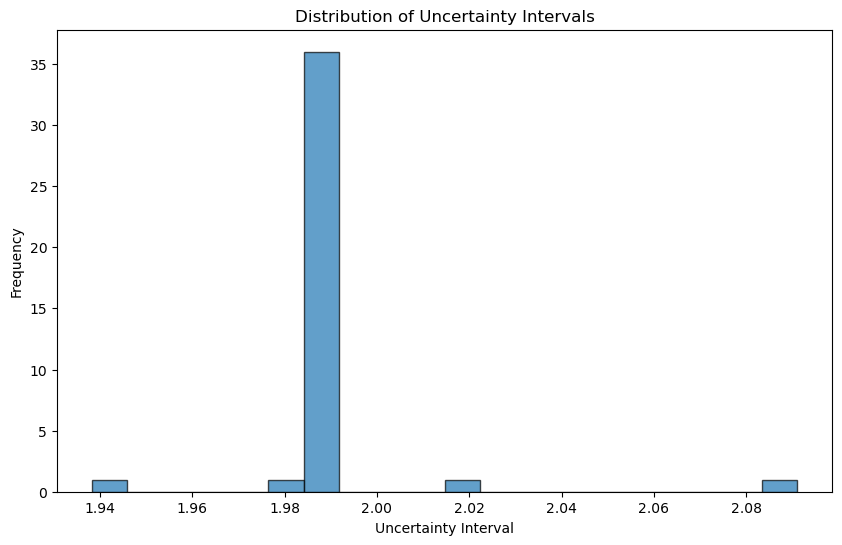

In [28]:
# Calculate the percentage of samples with uncenrtainty under certain thresholds
thresholds = [1.85]
counts = [(i['uncertainty'] < threshold).sum() for threshold in thresholds]

# Display the counts
for threshold, count in zip(thresholds, counts):
    print(f'Number of samples with uncertainty under {threshold}: {count}')

# Plot the distribution of the confidence column
plt.figure(figsize=(10, 6))
plt.hist(i['uncertainty'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Uncertainty Intervals')
plt.xlabel('Uncertainty Interval')
plt.ylabel('Frequency')
plt.show()

In [21]:
d.shape

(40, 6)